In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil

import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

Num GPUs Available:  1


# Preprocessing.

In [2]:
seed = 42
np.random.seed(seed)

In [3]:
root_dir = 'Datasets/GTSRB - German Traffic Sign Recognition Benchmark/'
directory = 'Datasets/GTSRB - German Traffic Sign Recognition Benchmark/Train/'
try:
    os.makedirs('Datasets/GTSRB - German Traffic Sign Recognition Benchmark/Working/Train')
    os.makedirs('Datasets/GTSRB - German Traffic Sign Recognition Benchmark/Working/Valid/')
except:
    print('Already Created')

Already Created


In [4]:
classes = os.listdir(directory)
num_classes = len(classes)
print(f'{classes},\n number: {num_classes}')

['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '5', '6', '7', '8', '9'],
 number: 43


In [5]:
source_path=[directory +f'{a}' for a in classes]
print(source_path)

['Datasets/GTSRB - German Traffic Sign Recognition Benchmark/Train/0', 'Datasets/GTSRB - German Traffic Sign Recognition Benchmark/Train/1', 'Datasets/GTSRB - German Traffic Sign Recognition Benchmark/Train/10', 'Datasets/GTSRB - German Traffic Sign Recognition Benchmark/Train/11', 'Datasets/GTSRB - German Traffic Sign Recognition Benchmark/Train/12', 'Datasets/GTSRB - German Traffic Sign Recognition Benchmark/Train/13', 'Datasets/GTSRB - German Traffic Sign Recognition Benchmark/Train/14', 'Datasets/GTSRB - German Traffic Sign Recognition Benchmark/Train/15', 'Datasets/GTSRB - German Traffic Sign Recognition Benchmark/Train/16', 'Datasets/GTSRB - German Traffic Sign Recognition Benchmark/Train/17', 'Datasets/GTSRB - German Traffic Sign Recognition Benchmark/Train/18', 'Datasets/GTSRB - German Traffic Sign Recognition Benchmark/Train/19', 'Datasets/GTSRB - German Traffic Sign Recognition Benchmark/Train/2', 'Datasets/GTSRB - German Traffic Sign Recognition Benchmark/Train/20', 'Dataset

In [6]:
classes_dir=[f'{a}_dir' for a in classes]
classes_dir

['0_dir',
 '1_dir',
 '10_dir',
 '11_dir',
 '12_dir',
 '13_dir',
 '14_dir',
 '15_dir',
 '16_dir',
 '17_dir',
 '18_dir',
 '19_dir',
 '2_dir',
 '20_dir',
 '21_dir',
 '22_dir',
 '23_dir',
 '24_dir',
 '25_dir',
 '26_dir',
 '27_dir',
 '28_dir',
 '29_dir',
 '3_dir',
 '30_dir',
 '31_dir',
 '32_dir',
 '33_dir',
 '34_dir',
 '35_dir',
 '36_dir',
 '37_dir',
 '38_dir',
 '39_dir',
 '4_dir',
 '40_dir',
 '41_dir',
 '42_dir',
 '5_dir',
 '6_dir',
 '7_dir',
 '8_dir',
 '9_dir']

In [7]:
for cl_dir,cl_path in zip(classes_dir,source_path):
    print(cl_dir,': ',len(os.listdir(cl_path)))

0_dir :  210
1_dir :  2220
10_dir :  2010
11_dir :  1320
12_dir :  2100
13_dir :  2160
14_dir :  780
15_dir :  630
16_dir :  420
17_dir :  1110
18_dir :  1200
19_dir :  210
2_dir :  2250
20_dir :  360
21_dir :  330
22_dir :  390
23_dir :  510
24_dir :  270
25_dir :  1500
26_dir :  600
27_dir :  240
28_dir :  540
29_dir :  270
3_dir :  1410
30_dir :  450
31_dir :  780
32_dir :  240
33_dir :  689
34_dir :  420
35_dir :  1200
36_dir :  390
37_dir :  210
38_dir :  2070
39_dir :  300
4_dir :  1980
40_dir :  360
41_dir :  240
42_dir :  240
5_dir :  1860
6_dir :  420
7_dir :  1440
8_dir :  1410
9_dir :  1470


In [8]:
train = 'Datasets/GTSRB - German Traffic Sign Recognition Benchmark/Working/Train'
valid = 'Datasets/GTSRB - German Traffic Sign Recognition Benchmark/Working/Valid'

In [9]:
import glob
from sklearn.model_selection import train_test_split

def split(data_path, train, validation, split_size=0.1):
    folders = os.listdir(data_path)
    for folder in folders:
        fullpath = os.path.join(data_path, folder)
        image = glob.glob(os.path.join(fullpath,'*.png'))
       
        X_train, X_valid = train_test_split(image, test_size = split_size)
       
        for x in X_train:
         #   print(x)
            path_to_folder = os.path.join(train,folder)
           
            if not os.path.isdir(path_to_folder):
                os.makedirs(path_to_folder)
            shutil.copy(x,path_to_folder)
       
        for y in X_valid:
            path_to_folder = os.path.join(validation, folder)
            if not os.path.isdir(path_to_folder):
                os.makedirs(path_to_folder)
            shutil.copy(y, path_to_folder)

In [10]:
#Commented to not run again
#split(directory, train=train,validation=valid,split_size = 0.2)

In [11]:
import pandas as pd

df = pd.read_csv("Datasets/GTSRB - German Traffic Sign Recognition Benchmark/Test.csv")
df.head(10)

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png
5,52,56,5,5,47,51,38,Test/00005.png
6,147,130,12,12,135,119,18,Test/00006.png
7,32,33,5,5,26,28,12,Test/00007.png
8,45,50,6,5,40,45,25,Test/00008.png
9,81,86,7,7,74,79,35,Test/00009.png


In [12]:
target = df['ClassId']

In [13]:
try:
    os.makedirs('Datasets/GTSRB - German Traffic Sign Recognition Benchmark/Working/Test/')
except:
    print('Already Created')

Already Created


In [14]:
test = 'Datasets/GTSRB - German Traffic Sign Recognition Benchmark/Working/Test/'

In [15]:
root_dir

'Datasets/GTSRB - German Traffic Sign Recognition Benchmark/'

In [16]:
def prepare_test(csv_path, src, dst):
    with open(csv_path, "r") as f:
        next(f)
        for line in f:
            split_line = line.split(',')
            image = split_line[-1][:-1]
            label = split_line[-2]
            #print(image, label)
            destination = dst + label
            if not os.path.isdir(destination):
                os.makedirs(destination)
            shutil.copy(src + image,destination)

In [17]:
csv_path = "Datasets/GTSRB - German Traffic Sign Recognition Benchmark/Test.csv"
src = root_dir
dst = test
#Commented to not run again
#prepare_test(csv_path, src, dst)

# Modeling

In [18]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Input, Dense, MaxPool2D, MaxPooling2D, Flatten, BatchNormalization, GlobalAvgPool2D, Dropout, AveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint

from tensorflow.keras import Model

In [19]:
width, height = 60, 60
batch_size = 64
# num_classes

In [20]:
classes_indices = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9','10','11','12','13','14','15','16','17','18','19',
                   '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', 
                   '35', '36', '37', '38', '39', '40', '41', '42']

In [72]:
def create_generators(train, valid, test):
    train_data_generator = ImageDataGenerator(rescale=1/255, data_format='channels_last', dtype=tf.float32)

    train_generator = train_data_generator.flow_from_directory(
        directory=train,
        target_size=(height, width),
        color_mode="rgb",
        batch_size=batch_size,
        class_mode="categorical",
        shuffle=True,
        seed=42,
        classes=classes_indices 
    )

    valid_data_generator = ImageDataGenerator(rescale=1/255, dtype=tf.float32, data_format='channels_last')
    valid_generator = valid_data_generator.flow_from_directory(
        directory=valid,
        target_size=(height, width),
        color_mode="rgb",
        batch_size=batch_size,
        class_mode="categorical",
        shuffle=True,
        seed=42,
        classes=classes_indices 
    )

    test_data_generator = ImageDataGenerator(rescale=1/255, dtype=tf.float32, data_format='channels_last')
    test_generator = test_data_generator.flow_from_directory(
        directory=test,
        target_size=(height, width),
        color_mode="rgb",
        batch_size=batch_size,
        class_mode="categorical",
        shuffle=False,
        classes=classes_indices 
    )
    
    return (train_generator, valid_generator, test_generator)

In [73]:
train_generator, valid_generator, test_generator = create_generators(train, valid, test)

Found 31367 images belonging to 43 classes.
Found 7842 images belonging to 43 classes.
Found 12630 images belonging to 43 classes.


In [74]:
# Lets setup a default layer, 
import tensorflow

class ConvBlock(tensorflow.keras.layers.Layer):
    def __init__(self, channels, **kwargs):
        super(ConvBlock, self).__init__(**kwargs)
        self.channels = channels
        
    def build(self, input_shape):
        self.main_layers=[
            Conv2D(self.channels[0], 3, padding="same", activation='relu', input_shape=input_shape),
            Conv2D(self.channels[0], 3, padding="same", activation='relu'),
            MaxPooling2D(2),
            Dropout(0.2),
            Conv2D(self.channels[1], 3, padding="same", activation='relu'),
            Conv2D(self.channels[1], 3, padding="same", activation='relu'),
            MaxPooling2D(2),
            Dropout(0.3),
            Conv2D(self.channels[2], 3, padding="same", activation='relu'),
            Conv2D(self.channels[2], 3, padding="same", activation='relu'),
            MaxPooling2D(2),
            Dropout(0.3)
        ]

    def call(self, inputs):
        x = inputs
        for layer in self.main_layers:
            x = layer(x)
        return x
    
    def get_config(self):
        config = super(ConvBlock, self).get_config()
        config.update({"channels": self.channels})
        return channels

In [75]:
class FullModel(tensorflow.keras.Model):
    def __init__(self, channels, num_classes=43):
        super().__init__()
        self.channels = channels
        self.drop = Dropout(0.3)        
        self.main_layers = [
            ConvBlock(self.channels),
            Flatten(),
            Dense(512, activation = 'relu'),
            Dense(256, activation = 'relu'),
            Dense(num_classes, activation='softmax')
        ]
        
    def call(self, inputs):
#         x = self.conv_block(inputs)
#         x = self.flat(x)
#         x = self.dense1(x)
#         x = self.drop(x)
#         x = self.dense2(x)
        x = inputs
        for layer in self.main_layers:
            x = layer(x)
        return x
    
    def summary(self):
        x = Input(shape=(60, 60, 3))
        model = Model(inputs=[x], outputs=self.call(x))
        return model.summary()
    
    def get_config(self):
        return {"channels": self.channels}
    
    @classmethod
    def from_config(cls, config):
        return cls(**config)

In [76]:
channels = [32, 64, 128, 256]
input_shape = (60, 60, 3)
model = FullModel(channels, num_classes)

In [90]:
#It's hard to save a model while it's subclassed, so another Sequential or functional model with the same Arch
model_repeated = Sequential([
            Conv2D(channels[0], 3, padding="same", activation='relu', input_shape=input_shape),
            Conv2D(channels[0], 3, padding="same", activation='relu'),
            BatchNormalization(),
            MaxPooling2D(2),
            
            Conv2D(channels[1], 3, padding="same", activation='relu'),
            Conv2D(channels[1], 3, padding="same", activation='relu'),
            BatchNormalization(),
            MaxPooling2D(2),
            
            Conv2D(channels[2], 3, padding="same", activation='relu'),
            Conv2D(channels[2], 3, padding="same", activation='relu'),
            BatchNormalization(),
            MaxPooling2D(2),
            
    
            Conv2D(channels[3], 3, padding="same", activation='relu'),
            Conv2D(512, 1, padding="same", activation='relu'),
            MaxPooling2D(2),
            Dropout(0.3),
    
            Flatten(),
            Dense(1024, activation = 'relu'),
            Dropout(0.5),
            Dense(512, activation = 'relu'),
            Dropout(0.5),
            Dense(num_classes, activation='softmax')
])

In [91]:

# model.compile(optimizer='adam',
#     loss=loss,
#     metrics=['accuracy'])

# STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
# STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
# cb = [tensorflow.keras.callbacks.EarlyStopping(patience=5)]
# history = model.fit_generator(generator=train_generator,
#                     steps_per_epoch=STEP_SIZE_TRAIN,
#                     validation_data=valid_generator,
#                     validation_steps=STEP_SIZE_VALID,
#                     epochs=1,
#                     callbacks=cb
# )

# model.evaluate_generator(valid_generator,
#                              steps=STEP_SIZE_VALID,
#                              verbose=1)

# STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
# test_generator.reset()
# model.evaluate_generator(test_generator,
#                              steps=STEP_SIZE_TEST,
#                              verbose=1)

In [92]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size


loss = tensorflow.keras.losses.CategoricalCrossentropy()

opt = tensorflow.keras.optimizers.Adam()
model_repeated.compile(optimizer=opt,
    loss=loss,
    metrics=['accuracy'])

history = model_repeated.fit(train_generator,
                    validation_data=valid_generator,
                    batch_size = batch_size,
                    epochs=15,
)



Epoch 1/15
491/491 [==============================] - 73s 147ms/step - loss: 1.7223 - accuracy: 0.5152 - val_loss: 0.5417 - val_accuracy: 0.8386
Epoch 2/15
491/491 [==============================] - 30s 61ms/step - loss: 0.1630 - accuracy: 0.9559 - val_loss: 0.0929 - val_accuracy: 0.9758
Epoch 3/15
491/491 [==============================] - 24s 49ms/step - loss: 0.0919 - accuracy: 0.9760 - val_loss: 0.0495 - val_accuracy: 0.9870
Epoch 4/15
491/491 [==============================] - 24s 49ms/step - loss: 0.0642 - accuracy: 0.9849 - val_loss: 0.0679 - val_accuracy: 0.9830
Epoch 5/15
491/491 [==============================] - 24s 49ms/step - loss: 0.0697 - accuracy: 0.9844 - val_loss: 0.1536 - val_accuracy: 0.9625
Epoch 6/15
491/491 [==============================] - 24s 49ms/step - loss: 0.0610 - accuracy: 0.9862 - val_loss: 0.1228 - val_accuracy: 0.9712
Epoch 7/15
491/491 [==============================] - 46s 93ms/step - loss: 0.0480 - accuracy: 0.9901 - val_loss: 0.0302 - val_accuracy

In [93]:
model_repeated.evaluate(valid_generator, verbose=1)

123/123 [==============================] - 6s 48ms/step - loss: 0.0548 - accuracy: 0.9916


[0.05484833940863609, 0.9915837645530701]

In [94]:
#model.summary()
model_repeated.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 60, 60, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 32)        9248      
_________________________________________________________________
batch_normalization (BatchNo (None, 60, 60, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 30, 30, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 64)        2

In [96]:
import warnings
warnings.filterwarnings('ignore')

tf.keras.backend.clear_session()

STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
test_generator.reset()
model_repeated.evaluate(test_generator,verbose=1)

198/198 [==============================] - 8s 39ms/step - loss: 0.2745 - accuracy: 0.9618


[0.2745470404624939, 0.9617577195167542]

In [97]:
model_repeated.save("my_model")

INFO:tensorflow:Assets written to: my_model\assets


In [98]:
test_generator.reset()
Y_pred = model_repeated.predict_generator(test_generator)
y_pred2 = model_repeated.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_pred2 = np.argmax(y_pred2, axis=1)

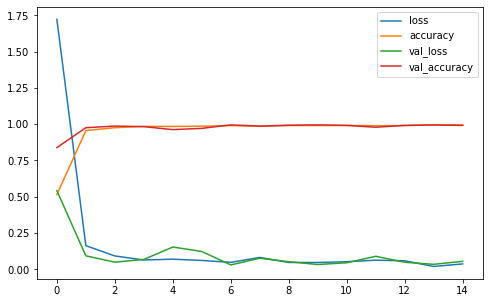

In [99]:
import matplotlib.pyplot as plt
%matplotlib inline

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

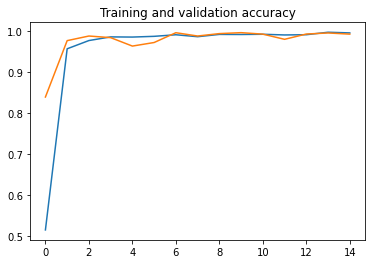

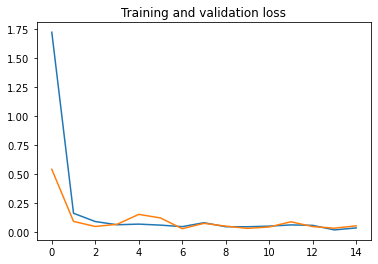

In [100]:
acc      = history.history['accuracy']
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history['loss']
val_loss = history.history['val_loss' ]

epochs   = range(len(acc))

plt.plot  ( epochs, acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss')

In [101]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in y_pred]

In [102]:
filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":y_pred2})

In [103]:
results

,Filename,Predictions
0,0\00243.png,0
1,0\00252.png,0
2,0\00403.png,0
3,0\00579.png,0
4,0\00675.png,0
...,...,...
12625,42\11842.png,42
12626,42\12019.png,42
12627,42\12098.png,42
12628,42\12276.png,42
